# 🎬 Classification de critiques de films — Dataset IMDB

## 🎯 Objectif du projet
L’objectif de ce projet est de construire un modèle capable de **classifier automatiquement des critiques de films** selon leur polarité — **positive** ou **négative**.  
Ce problème, appelé *sentiment analysis*, est un classique du **Traitement Automatique du Langage (TAL)**, et permet d’explorer les étapes clés du prétraitement textuel et de l’apprentissage supervisé.

## 🗂️ Jeu de données : IMDB 50K Movie Reviews
Le dataset utilisé est le **IMDB Dataset of 50K Movie Reviews**, disponible sur [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).  
Il contient **50 000 critiques de films** issues du site IMDb, réparties équitablement entre :
- **25 000 critiques positives**  
- **25 000 critiques négatives**

Chaque exemple est une paire :
- `review` : le texte de la critique (en anglais)  
- `sentiment` : le label associé (`positive` ou `negative`)

Le dataset est déjà équilibré et nettoyé, ce qui permet de se concentrer sur l’expérimentation de différentes approches de classification.

## ⚙️ Méthodologie du projet
Ce notebook suit une démarche simple et structurée pour mettre en place un pipeline complet de classification :

1. **Préparation du dataset**
   - Chargement et aperçu des données  
   - Nettoyage de base du texte (ponctuation, minuscules, etc.)  
   - Tokenisation simple  

2. **Création du pipeline**
   - Vectorisation du texte via **TF-IDF**  
   - Entraînement d’un modèle de **Régression Logistique** pour la classification  

3. **Évaluation du modèle**
   - Calcul des métriques principales (accuracy, précision, rappel, F1-score)  
   - Visualisation d’une **matrice de confusion** pour interpréter les résultats  

## 🧭 Objectif final
- Démontrer la mise en place d’un pipeline complet de **classification de texte** avec des outils standards du TAL.  
- Produire un **notebook clair et commenté**.

---


## 📥 Chargement du dataset

Dans cette section, nous téléchargeons le dataset **IMDB 50K Movie Reviews** directement depuis Kaggle grâce à la librairie `kagglehub`.  
Cela permet de récupérer automatiquement les fichiers nécessaires sans avoir à les importer manuellement.

Le dataset contient :
- 50 000 critiques de films (`review`)
- Un label (`sentiment`) indiquant si la critique est **positive** ou **négative**

In [2]:
# 📥 Téléchargement du dataset IMDB depuis Kaggle
import kagglehub
import pandas as pd

# Téléchargement automatique du dataset
dataset_path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("✅ Dataset téléchargé avec succès.")
print("📁 Chemin vers les fichiers :", dataset_path)

# Chargement du fichier CSV principal
csv_path = f"{dataset_path}/IMDB Dataset.csv"
df = pd.read_csv(csv_path)

# Aperçu des données
print("\nAperçu des données :")
df.head()

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
✅ Dataset téléchargé avec succès.
📁 Chemin vers les fichiers : /kaggle/input/imdb-dataset-of-50k-movie-reviews

Aperçu des données :


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 🔍 Exploration du dataset

Avant de passer au prétraitement, explorons brièvement le contenu du dataset :
- Taille et structure du jeu de données  
- Répartition des labels (positif/négatif)  
- Quelques exemples de critiques  

Cette étape permet de vérifier la cohérence des données avant le nettoyage.

Nombre de lignes : 50000
Nombre de colonnes : 2

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

Valeurs manquantes par colonne :
review       0
sentiment    0
dtype: int64

Répartition des sentiments :
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


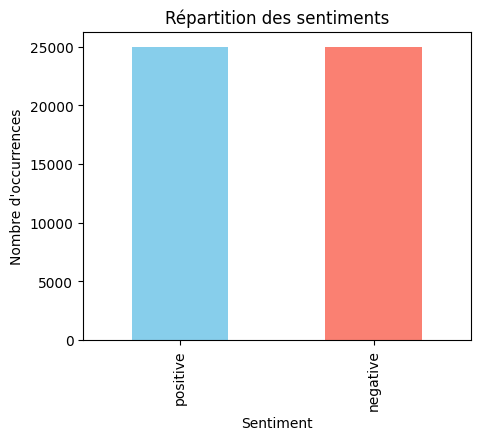


🔹 Exemple de critique positive :

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ ...

🔸 Exemple de critique négative :

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing li

In [3]:
# Dimensions du dataset
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# Informations générales
print("\nInformations sur le dataset :")
df.info()

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Distribution des classes
print("\nRépartition des sentiments :")
print(df['sentiment'].value_counts())

# Visualisation de la répartition sous forme de graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
df['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Répartition des sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Nombre d'occurrences")
plt.show()

# Aperçu de quelques critiques positives et négatives
print("\n🔹 Exemple de critique positive :\n")
print(df[df['sentiment'] == 'positive']['review'].iloc[0][:500], "...\n")

print("🔸 Exemple de critique négative :\n")
print(df[df['sentiment'] == 'negative']['review'].iloc[0][:500], "...")

## 🧹 Préparation et nettoyage du texte

Dans cette étape, nous allons nettoyer le texte pour supprimer les éléments inutiles à l’analyse :

- Suppression des balises HTML et caractères spéciaux  
- Mise en minuscules  
- Suppression de la ponctuation et des chiffres  
- Tokenisation simple (découpage du texte en mots)  
- (Optionnel) Suppression des *stopwords* en anglais

Ces opérations permettent d’obtenir un texte normalisé, plus adapté à la vectorisation TF-IDF et à l’apprentissage supervisé.

In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords si nécessaire
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """Nettoie et tokenize une critique de film."""
    # Supprimer les balises HTML
    text = re.sub(r'<.*?>', '', text)

    # Mettre en minuscules
    text = text.lower()

    # Supprimer la ponctuation et les chiffres
    text = re.sub(f"[{re.escape(string.punctuation)}0-9]", " ", text)

    # Supprimer les mots très courts et les espaces multiples
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenisation simple
    tokens = text.split()

    # Retirer les stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Reconstruire la phrase nettoyée
    return " ".join(tokens)

# Application du nettoyage sur une petite portion pour test
df['clean_review'] = df['review'].apply(clean_text)

# Aperçu du résultat
print("✅ Exemple avant/après nettoyage :\n")
for i in range(2):
    print("Texte original :\n", df['review'].iloc[i][:300], "\n")
    print("Texte nettoyé :\n", df['clean_review'].iloc[i][:300], "\n---\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ Exemple avant/après nettoyage :

Texte original :
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Tru 

Texte nettoyé :
 one reviewers mentioned watching episode hooked right exactly happened first thing struck brutality unflinching scenes violence set right word trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called nickname given oswald maximum security state pe 
---

Texte original :
 A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari"  


## 🧠 Pipeline TF-IDF + Régression Logistique

Dans cette étape, nous allons construire un pipeline complet pour la classification du sentiment :

1. Séparation des données en ensembles **train** et **test**  
2. Vectorisation du texte avec **TF-IDF**  
3. Entraînement d'un modèle de **Régression Logistique**  
4. Évaluation des performances avec :
   - Accuracy
   - F1-score
   - Matrice de confusion (visualisation graphique)

✅ Train size: 40000, Test size: 10000

✅ Modèle entraîné avec succès

📊 Accuracy : 0.8968
📊 F1-score (positive) : 0.8977


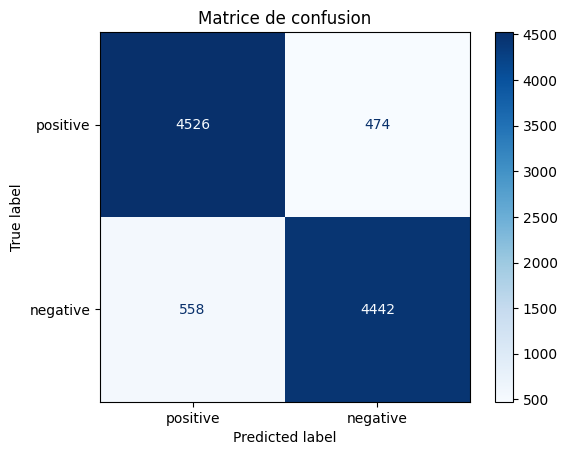

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1️⃣ Séparation train/test
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"✅ Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

# 2️⃣ Création du pipeline TF-IDF + Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1,2))),  # TF-IDF uni- et bi-grammes
    ('clf', LogisticRegression(max_iter=1000))
])

# 3️⃣ Entraînement du modèle
pipeline.fit(X_train, y_train)
print("\n✅ Modèle entraîné avec succès")

# 4️⃣ Prédictions
y_pred = pipeline.predict(X_test)

# 5️⃣ Évaluation
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='positive')
print(f"\n📊 Accuracy : {acc:.4f}")
print(f"📊 F1-score (positive) : {f1:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'negative'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()


## ✅ Conclusion

Le pipeline TF-IDF + Régression Logistique permet d'obtenir un modèle simple mais performant pour la classification des critiques de films.  

Prochaines étapes possibles :
- Expérimenter avec d'autres modèles (SVM, Random Forest, BERT, etc.)  
- Tester différentes configurations de TF-IDF (ngrammes, stopwords, max_features)